In [1]:
#this means that the graphs we will create are inline for the notebook
%matplotlib inline 
import numpy as np
import pandas as pd

In [3]:
# loads origin csv data
df = pd.read_csv("data_for_ml.csv")
df = df.drop(['name', 'id'], axis=1)

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 10)

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Populating the interactive namespace from numpy and matplotlib


In [5]:
linkage_matrix = linkage(df, 'ward')
linkage_matrix

array([[ 10.        ,  13.        ,   8.30739243,   2.        ],
       [  0.        ,   1.        ,   9.10933724,   2.        ],
       [  2.        ,  11.        ,  11.12291333,   2.        ],
       [  5.        ,   8.        ,  12.99539799,   2.        ],
       [  3.        ,   4.        ,  13.23244497,   2.        ],
       [  7.        ,   9.        ,  14.17340735,   2.        ],
       [ 12.        ,  15.        ,  16.44197499,   3.        ],
       [  6.        ,  18.        ,  18.66594135,   3.        ],
       [ 14.        ,  19.        ,  23.59086943,   4.        ],
       [ 16.        ,  21.        ,  25.72398612,   5.        ],
       [ 20.        ,  23.        ,  40.24851855,   8.        ],
       [ 17.        ,  22.        ,  49.42285187,   6.        ],
       [ 24.        ,  25.        ,  77.90672246,  14.        ]])

In [6]:
# Creates dataframe for results
dfresults = pd.DataFrame(columns=['idx1', 'idx2', 'distance', 'sample_count', 'merge_id'])

for idx in range(0, len(linkage_matrix)):
    
    currentArr = linkage_matrix[idx]
    
    # Creates current hotel row
    curow = { 'idx1': currentArr[0],
              'idx2': currentArr[1],
              'distance': currentArr[2],
              'sample_count': currentArr[3],
              'merge_id': idx + len(df) }
    
    # Append current hotel row to results data frame       
    dfresults = dfresults.append(curow, ignore_index=True)
    
dfresults.head()

,idx1,idx2,distance,sample_count,merge_id
0,10.0,13.0,8.307392,2.0,14.0
1,0.0,1.0,9.109337,2.0,15.0
2,2.0,11.0,11.122913,2.0,16.0
3,5.0,8.0,12.995398,2.0,17.0
4,3.0,4.0,13.232445,2.0,18.0


In [7]:
dfresults.to_csv('clustring_results.csv', encoding='utf-8')

<function scipy.cluster.hierarchy.dendrogram>

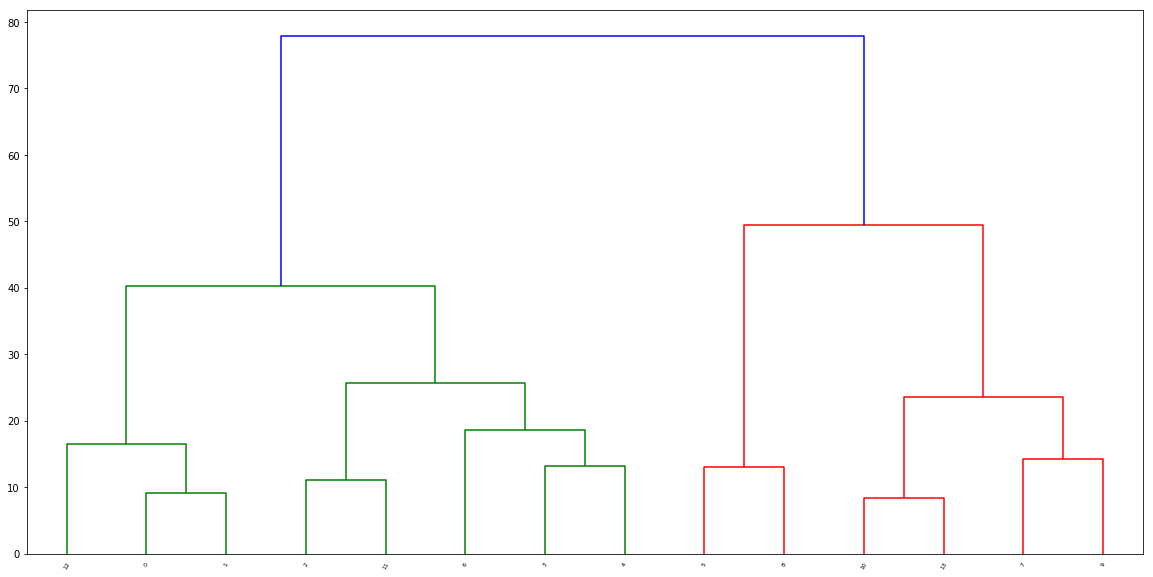

In [8]:
dendrogram(
    linkage_matrix,
    truncate_mode="lastp",  # show only the last p merged clusters
    p=200,  # show only the last p merged clusters
    show_leaf_counts=True,  # numbers in brackets are counts, others idx
    leaf_rotation=60.,
    leaf_font_size=6.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
dendrogram
# plt.show()